Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.ndimage
import matplotlib.pyplot as plt

Leitura e Separação dos dados

In [ ]:
geoGold = pd.read_csv('geoGold_erro.csv')

In [ ]:
geoGold.head()

In [ ]:
#Separando os dataframes para plotar nos gráficos

mapbox = geoGold[geoGold['geoapi_id' ] == 'MapBox']
google = geoGold[geoGold['geoapi_id'] == 'Google']
tomtom = geoGold[geoGold['geoapi_id'] == 'TomTom']
ors = geoGold[geoGold['geoapi_id'] == 'OpenRouteService']

m = np.asarray(mapbox['erro'].tolist())
min_m = np.min(m)
max_m = np.max(m)

g = np.asarray(google['erro'].tolist())
min_g = np.min(g)
max_g = np.max(g)

t = np.asarray(tomtom['erro'].tolist())
min_t = np.min(t)
max_t = np.max(t)

o = np.asarray(ors['erro'].tolist())
min_o = np.min(o)
max_o = np.max(o)

minimo = np.min(np.asanyarray([min_m, min_g, min_t, min_o]))
maximo = np.max(np.asanyarray([max_m, max_g, max_t, min_o]))



Mapbox

In [ ]:
# Leitura dos dados de altitude do dataframe mapbox
x = np.asarray(mapbox['lonGold'].tolist())
y = np.asarray(mapbox['latGold'].tolist())
z = np.asarray(mapbox['erro'].tolist())

# Definição do tamanho da grade
x_arr = np.linspace(np.min(x), np.max(x), 100)
y_arr = np.linspace(np.min(y), np.max(y), 100)
x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)

# Grid de altitude
z_mesh = sp.interpolate.griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Suavização do contorno usando filtro gaussiano
sigma = [5, 5]
z_mesh_smoothed = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')

# Criação da figura de contorno usando o matplotlib
fig, ax = plt.subplots(figsize=(6, 4))

# Criação do contorno com escala completa de cores
contono = ax.contourf(x_mesh, y_mesh, z_mesh, levels=100, cmap='tab20b')
cbar = fig.colorbar(contono, ax=ax, format='%.2f')
cbar.set_label('Error (Km)')

plt.plot(x, y, 'x', color='black', markersize=0.1, alpha=0.3)
plt.title('Mapbox error graphic')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


Google

In [ ]:
# Leitura dos dados de altitude do dataframe mapbox
x = np.asarray(google['lonGold'].tolist())
y = np.asarray(google['latGold'].tolist())
z = np.asarray(google['erro'].tolist())

# Definição do tamanho da grade
x_arr = np.linspace(np.min(x), np.max(x), 500)
y_arr = np.linspace(np.min(y), np.max(y), 500)
x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)

# Grid de altitude
z_mesh = sp.interpolate.griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Suavização do contorno usando filtro gaussiano
sigma = [5, 5]
z_mesh_smoothed = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')

# Criação da figura de contorno usando o matplotlib
fig, ax = plt.subplots(figsize=(6, 4))

# Criação do contorno com escala completa de cores
contorno = ax.contourf(x_mesh, y_mesh, z_mesh_smoothed, levels=100, cmap='tab20b')
cbar = fig.colorbar(contorno, ax=ax, format='%.2f')
cbar.set_label('Error (Km)')


plt.plot(x, y, 'x', color='black', markersize=0.5, alpha=0.3)
plt.title('Google error graphic')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


TomTom

In [ ]:
# Leitura dos dados de altitude do dataframe tomtom
x = np.asarray(tomtom['lonGold'].tolist())
y = np.asarray(tomtom['latGold'].tolist())
z = np.asarray(tomtom['erro'].tolist())

# Definição do tamanho da grade
x_arr = np.linspace(np.min(x), np.max(x), 500)
y_arr = np.linspace(np.min(y), np.max(y), 500)
x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)

# Grid de altitude
z_mesh = sp.interpolate.griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Suavização do contorno usando filtro gaussiano
sigma = [5, 5]
z_mesh_smoothed = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')

# Criação da figura de contorno usando o matplotlib
fig, ax = plt.subplots(figsize=(6, 4))

# Criação do contorno com escala completa de cores
contorno = ax.contourf(x_mesh, y_mesh, z_mesh_smoothed, levels=100, cmap='tab20b')
cbar = fig.colorbar(contorno, ax=ax, format='%.2f')
cbar.set_label('Error (Km)')

plt.plot(x, y, 'x', color='black', markersize=0.1, alpha=0.3)
plt.title('TomTom error graphic')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

ORS

In [ ]:
# Leitura dos dados de altitude do dataframe tomtom
x = np.asarray(ors['lonGold'].tolist())
y = np.asarray(ors['latGold'].tolist())
z = np.asarray(ors['erro'].tolist())

# Definição do tamanho da grade
x_arr = np.linspace(np.min(x), np.max(x), 500)
y_arr = np.linspace(np.min(y), np.max(y), 500)
x_mesh, y_mesh = np.meshgrid(x_arr, y_arr)

# Grid de altitude
z_mesh = sp.interpolate.griddata((x, y), z, (x_mesh, y_mesh), method='linear')

# Suavização do contorno usando filtro gaussiano
sigma = [5, 5]
z_mesh_smoothed = sp.ndimage.filters.gaussian_filter(z_mesh, sigma, mode='constant')

fig, ax = plt.subplots(figsize=(6, 4))

contorno = ax.contourf(x_mesh, y_mesh, z_mesh_smoothed, levels=100, cmap='tab20b')
cbar = fig.colorbar(contorno, ax=ax, format='%.2f')
cbar.set_label('Error (Km)')

plt.plot(x, y, 'x', color='black', markersize=0.1, alpha=0.3)
plt.title('Open Route Service error graphic')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

## Gráficos de Erro e falhas utilizando gráfico Hexograma

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
limite = 0.3

geoGold = pd.read_csv('geoGold_erro.csv')

def determinar_falha(erro):
    if erro <= 0.15:
        return 0.0
    else:
        return 1.0

falha =  geoGold['erro'].apply(determinar_falha)

geoGold['falha'] = falha

geoGold.name = 'Todas as APIs'
geoGoldL = geoGold[geoGold['erro'] < limite]
geoGoldL.name = 'Todas as APIs'


mapbox = geoGold[geoGold['geoapi_id' ] == 'MapBox']
mapbox.name = 'Mapbox'
mapboxL = mapbox[mapbox['erro'] < limite]
mapboxL.name = 'Mapbox'

google = geoGold[geoGold['geoapi_id'] == 'Google']
google.name = 'Google Maps'
googleL = google[google['erro'] < limite]
googleL.name = 'Google Maps'

tomtom = geoGold[geoGold['geoapi_id'] == 'TomTom']
tomtom.name = 'TomTom'
tomtomL =  tomtom[tomtom['erro'] < limite]
tomtomL.name = 'TomTom'

ors = geoGold[geoGold['geoapi_id'] == 'OpenRouteService']
ors.name = 'Open Route Service'
orsL = ors[ors['erro'] < limite]
orsL.name = 'Open Route Service'


In [6]:
geoGold

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,number,street,city,district_x,postcode,latGold,lonGold,geoapi_id,request_id,lat,long,accuracy,district_y,public_place,erro,falha
0,0,0,0,0,285,RUA ANTONIO FRANCISCO PEREIRA,JUQUITIBA,BARNABES,NaN,-23.986886,-47.143986,Google,9997,-23.986137,-47.144314,NaN,BARNABES,RUA ANTONIO FRANCISCO PEREIRA,0.089394,0.0
1,1,0,0,0,285,RUA ANTONIO FRANCISCO PEREIRA,JUQUITIBA,BARNABES,NaN,-23.986886,-47.143986,TomTom,9997,-23.985790,-47.144410,14.062144,BARNABES,RUA ANTONIO FRANCISCO PEREIRA,0.128831,0.0
2,2,0,0,0,285,RUA ANTONIO FRANCISCO PEREIRA,JUQUITIBA,BARNABES,NaN,-23.986886,-47.143986,MapBox,9997,-22.555770,-47.401660,0.638148,BARNABES,RUA ANTONIO FRANCISCO PEREIRA,160.670660,1.0
3,3,0,0,0,285,RUA ANTONIO FRANCISCO PEREIRA,JUQUITIBA,BARNABES,NaN,-23.986886,-47.143986,OpenRouteService,9997,-23.938906,-47.024205,0.600000,BARNABES,RUA ANTONIO FRANCISCO PEREIRA,13.299284,1.0
4,4,1,1,1,09,ESTRADA DAS PEREIRAS,JUQUITIBA,JUQUITIBA,NaN,-23.992136,-47.090648,TomTom,9998,-23.174240,-46.570320,8.543887,JUQUITIBA,ESTRADA DAS PEREIRAS,105.006602,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45309,48019,12499,12499,12499,101,AVENIDA ANTONIO P DE MIRANDA,SALESOPOLIS,SALESOPOLIS,NaN,-23.531405,-45.844148,TomTom,22328,-23.530410,-45.844320,16.174379,SALESOPOLIS,AVENIDA ANTONIO P DE MIRANDA,0.111589,0.0
45310,48020,12499,12499,12499,101,AVENIDA ANTONIO P DE MIRANDA,SALESOPOLIS,SALESOPOLIS,NaN,-23.531405,-45.844148,MapBox,22328,-23.542280,-45.845415,0.517160,SALESOPOLIS,AVENIDA ANTONIO P DE MIRANDA,1.211352,1.0
45311,48021,12500,12500,12500,25,RUA ROQUE TORRAGA,SALESOPOLIS,SALESOPOLIS,NaN,-23.529823,-45.841153,OpenRouteService,22329,-23.530879,-45.857855,0.600000,SALESOPOLIS,RUA ROQUE TORRAGA,1.709574,1.0
45312,48022,12500,12500,12500,25,RUA ROQUE TORRAGA,SALESOPOLIS,SALESOPOLIS,NaN,-23.529823,-45.841153,TomTom,22329,-23.529840,-45.841080,11.944942,SALESOPOLIS,RUA ROQUE TORRAGA,0.007689,0.0


In [3]:
apis = [ geoGold, mapbox, google, tomtom, ors]
apisL = [geoGoldL, mapboxL, googleL, tomtomL, orsL]

In [21]:
shapefile_path = 'https://github.com/rcpsilva/UncertaintyQuantificationForGeocodingServices/raw/main/PaperGeoinfo/results/SMunicipios_2022/SP_Municipios_2022.shp'
gdf = gpd.read_file(shapefile_path,encoding="utf-8")
city_name = "São Paulo"  # Replace with the actual city name you want to plot
city_gdf = gdf[gdf['NM_MUN'] == city_name]


In [22]:
city_gdf

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
562,3550308,São Paulo,SP,1521.202,"POLYGON ((-46.63512 -23.83850, -46.63455 -23.8..."


<Axes: >

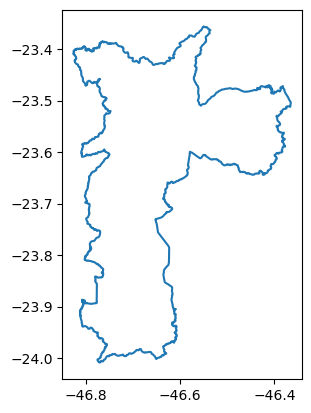

In [23]:
city_gdf.boundary.plot()

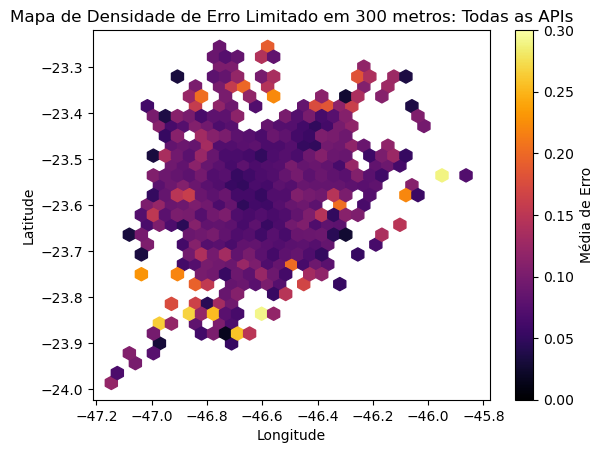

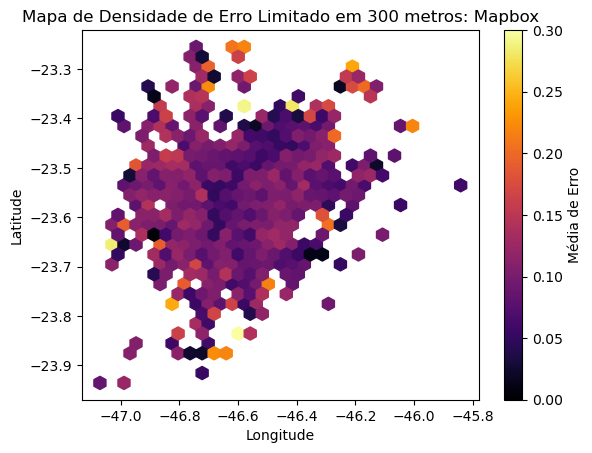

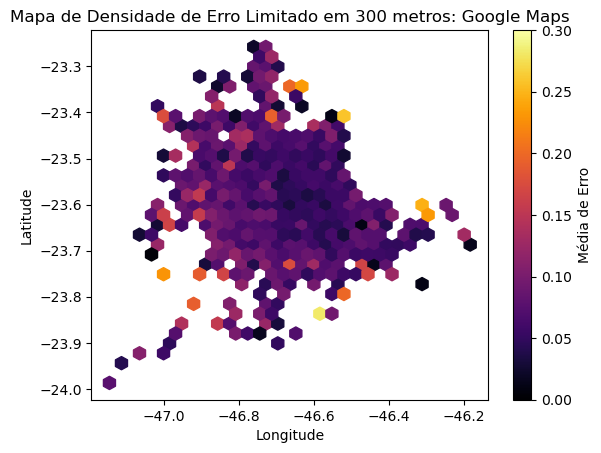

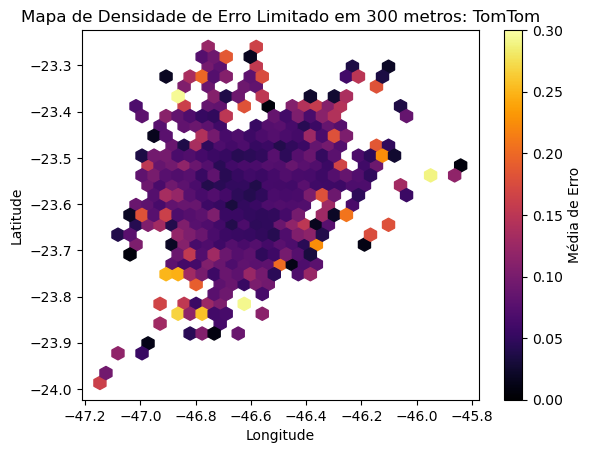

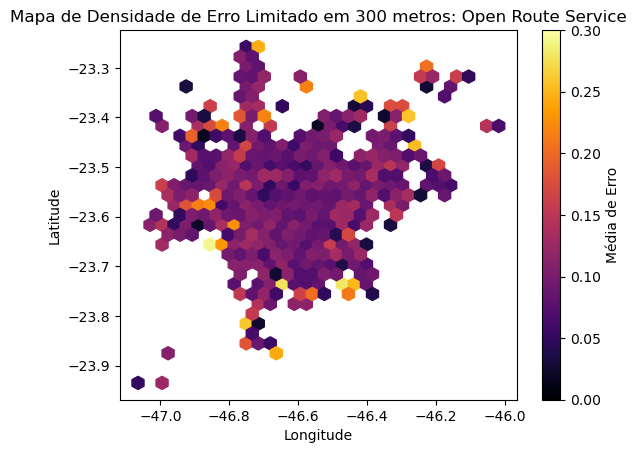

In [8]:

gridsize = 30

for api in apisL:
    city_gdf.boundary.plot()
    hb = plt.hexbin(api['lonGold'], api['latGold'], C=api['erro'], gridsize=gridsize, cmap='inferno',reduce_C_function=np.mean)
    cb = plt.colorbar()
    cb.set_label('Média de Erro')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Mapa de Densidade de Erro Limitado em 300 metros: {}'.format(api.name))
    plt.clim(vmin=0, vmax=0.3)
    plt.show()


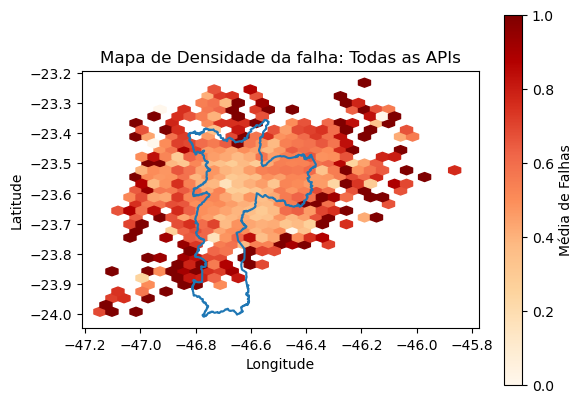

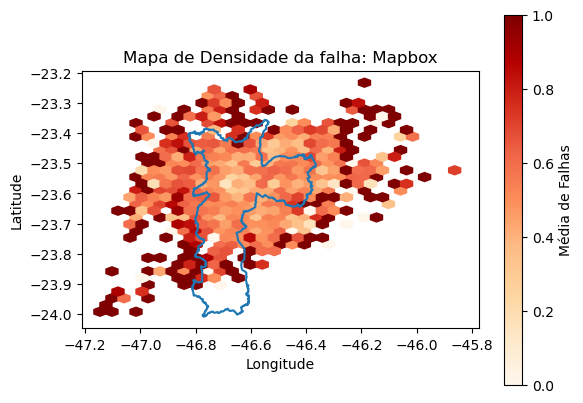

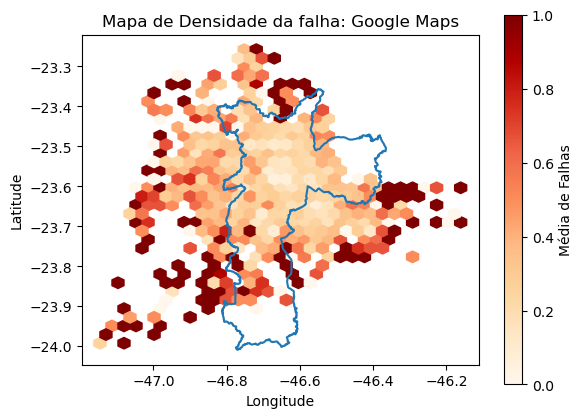

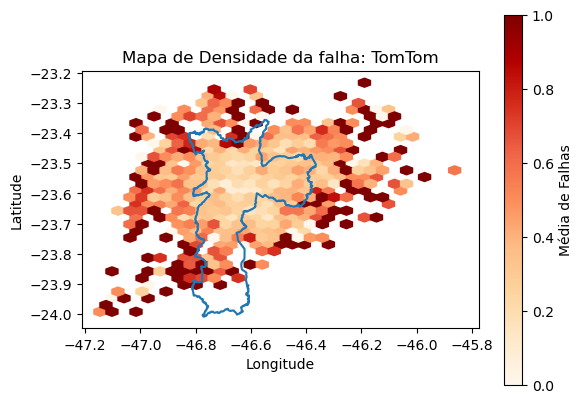

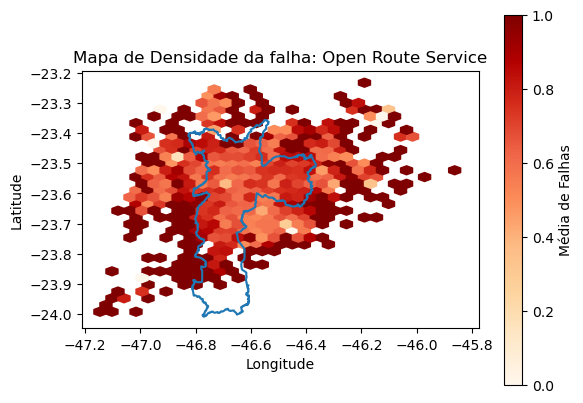

In [24]:

gridsize = 30

for api in apis:
    city_gdf.boundary.plot()
    hb = plt.hexbin(api['lonGold'], api['latGold'], C=api['falha'], gridsize=gridsize, cmap='OrRd',reduce_C_function=np.mean)
    cb = plt.colorbar()
    cb.set_label('Média de Falhas')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Mapa de Densidade da falha: {}'.format(api.name))

    plt.show()

In [ ]:
bhTotal = pd.read_csv('baseBHtransformada.csv')
bhTotal = bhTotal[['LATITUDE', 'LONGITUDE']].rename(columns={'LATITUDE': 'y', 'LONGITUDE': 'x'})
bhTotal.name = 'completa'

bhAmostra = pd.read_csv('amostraBH.csv')
bhAmostra = bhAmostra[['LATITUDE', 'LONGITUDE']].rename(columns={'LATITUDE': 'y', 'LONGITUDE': 'x'})
bhAmostra.name = 'amostrada'

#geoGold_d = geoGold[]

plots = [bhTotal, bhAmostra]



In [ ]:
geoGold.head(2)

In [ ]:
for p in plots:
    city_gdf.boundary.plot()
    plt.plot( p['y'],p['x'], '.', color='blue', markersize=0.1, alpha=0.3)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Gráfico de pontos da base {}'.format(p.name))

    plt.show()
